In [1]:
import jax.numpy as jnp
import numpy as np

import GOFevaluation

from appletree import utils
from appletree import randgen, hist
from appletree.randgen import normal

In [2]:
utils.set_gpu_memory_usage(0.2)

In [3]:
batch_size = int(1e6)
key = randgen.get_key()
key, x = normal(key, 0, 2, shape=(batch_size, ))
key, y = normal(key, 0, 1, shape=(batch_size, ))

In [4]:
sample = np.array(jnp.stack((x, y)).T)
bins_x, bins_y = GOFevaluation.utils._get_equiprobable_binning(sample, [10, 20], [0, 1])

/opt/miniconda3/envs/XENONnT_2022.06.2/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:209: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [5]:
equi_hist = hist.make_hist_irreg_bin_2d(sample, bins_x, bins_y, weights=jnp.ones(len(sample)))

In [6]:
bins_x = np.array(bins_x)
bins_y = np.array(bins_y)

In [7]:
bins_x[0] = -10
bins_x[-1] = 10
bins_y[:, 0] = -10
bins_y[:, -1] = 10

<AxesSubplot:>

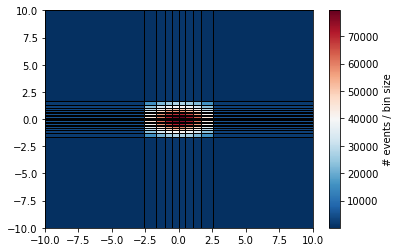

In [8]:
utils.plot_irreg_histogram_2d(bins_x, bins_y, equi_hist, density=True)